### UCL 2021/22 Data Analysis & Predictions


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import tarfile 
import urllib

In [25]:
# Functions used for Clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import pairwise_distances
#from scipy.spatial.distance import pdist
from sklearn.datasets import make_blobs
#from sklearn.cluster import DBSCAN
#from sklearn.datasets import make_moons

In [17]:
# Dataframes 
df_attacking = pd.read_csv("data/202122/attacking.csv", index_col = 0)
df_attempts = pd.read_csv("data/202122/attempts.csv", index_col = 0)
df_defending = pd.read_csv("data/202122/defending.csv", index_col = 0)
df_disciplinary = pd.read_csv("data/202122/disciplinary.csv", index_col = 0)
df_distribution = pd.read_csv("data/202122/distributon.csv", index_col = 0)
df_goalkeeping = pd.read_csv("data/202122/goalkeeping.csv", index_col = 0)
df_goals = pd.read_csv("data/202122/goals.csv", index_col = 0)
df_key_stats = pd.read_csv("data/202122/key_stats.csv")

In [18]:
df_fwstats1 = pd.merge(df_attacking, df_attempts, how="outer", on=["player_name", "club", "position"])
df_fwstats2 = pd.merge(df_fwstats1, df_distribution, how="outer", on=["player_name", "club", "position"])
df_fwstats3 = pd.merge(df_fwstats2, df_goals, how="outer", on=["player_name", "club", "position"])
df_fwstats = pd.merge(df_fwstats3, df_key_stats, how="outer", on=["player_name", "club", "position"])
df_fwstats = df_fwstats.loc[df_fwstats['position'] == 'Forward']
df_fwstats = df_fwstats.dropna()
#print(df_fwstats.columns.tolist())
df_fwstats = df_fwstats[['player_name','club','goals_y','assists_y','dribbles','total_attempts','pass_attempted','pass_completed',
'headers','outside_areas','distance_covered']]
df_fwstats

C:\Users\XuanD\AppData\Local\Temp\ipykernel_18528\3834538670.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'match_played_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_fwstats3 = pd.merge(df_fwstats2, df_goals, how="outer", on=["player_name", "club", "position"])


,player_name,club,goals_y,assists_y,dribbles,total_attempts,pass_attempted,pass_completed,headers,outside_areas,distance_covered
1,Vinícius Júnior,Real Madrid,4.0,6.0,83.0,27.0,451.0,377.0,0.0,0.0,133.0
3,Antony,Ajax,2.0,5.0,28.0,26.0,322.0,262.0,0.0,0.0,65.1
8,Mbappé,Paris,6.0,4.0,43.0,27.0,257.0,220.0,0.0,0.0,65.2
9,Gerard Moreno,Villarreal,2.0,4.0,9.0,21.0,163.0,110.0,1.0,0.0,65.7
13,Müller,Bayern,4.0,3.0,2.0,14.0,366.0,283.0,1.0,1.0,98.5
16,Coman,Bayern,2.0,3.0,59.0,20.0,329.0,271.0,0.0,0.0,76.3
19,Zapata,Atalanta,3.0,3.0,10.0,22.0,130.0,92.0,0.0,0.0,50.1
20,Lewandowski,Bayern,13.0,3.0,1.0,31.0,206.0,163.0,1.0,0.0,99.7
30,Forsberg,Leipzig,2.0,2.0,3.0,11.0,164.0,132.0,0.0,1.0,48.2
37,Tadić,Ajax,2.0,2.0,13.0,12.0,303.0,231.0,0.0,0.0,78.9


In [6]:
features, true_labels = make_blobs(
    n_samples = 37,
    centers = 4,
    cluster_std = 2.75,
    random_state=42
)

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features[:5]

array([[-0.84822282, -1.19029545],
       [-0.82072143, -0.12919947],
       [ 1.51666633, -0.54927066],
       [ 0.97055797,  0.85369229],
       [-0.5844325 ,  0.71452207]])

In [9]:
kwargs = {
    "init":"random",
    "n_init":10,
    "max_iter":300,
    "random_state":42,
}

sse = []
for k in range(1,6):
    kmeans = KMeans(n_clusters=k, **kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

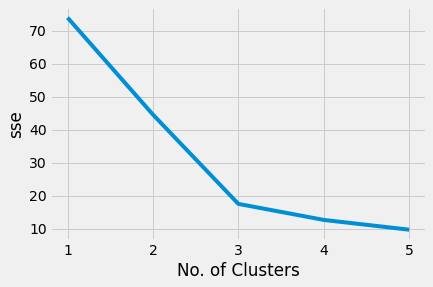

In [12]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,6), sse)
plt.xticks(range(1,6))
plt.xlabel("No. of Clusters")
plt.ylabel("sse")
kl = KneeLocator(range(1,6),sse,curve="convex",direction="decreasing")
kl.elbow
plt.show()

In [26]:
preprocessor = Pipeline([
    "kmeans",
    ("scaler",MinMaxScaler()),
    ("pca",PCA(n_components=2,random_state=42)),
])

In [27]:
clusterer = Pipeline(
    [(
        "kmeans",
        KMeans(
            n_clusters=4,
            init = "kmeans++",
            n_init = 50,
            max_iter = 500,
            random_state = 42,
        ),
    ),]
)

In [28]:
pipe = Pipeline(
    [
        ("preprocessor",preprocessor),
        ("clusterer",clusterer)
    ]
)

In [35]:
#preprocessed_data = pipe["preprocessor"].transform(df_fwstats)